<a href="https://colab.research.google.com/github/Srivatsava6/Python_Case_Study/blob/main/Python_Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python- Case Study**

# **Electric Vehicle Analysis for Fleet Purchase Decision Making for Sales Representatives in Greenwish Ltd**

In this case study  I will be Conducting comprehensive analysis using Python libraries (NumPy, Pandas, Matplotlib, Beautiful Soup) on the 'evdataset.csv'. Evaluate relevant factors such as electric range, fast charge speed, cargo volume, and other key variables to identify the optimal electric vehicle make and model for Greenwish Ltd's fleet of sales rep cars in the UK

For sales reps considering an electric vehicle (EV) purchase, several key factors are crucial:

> **Electric range** determines how far the vehicle can travel on a single charge, minimizing the need for frequent recharging during busy workdays.**Charge speed** and **fast charge speed** are essential for time efficiency, enabling quick recharging and reducing downtime. **Battery capacity** ensures extended driving range and alleviates range anxiety, especially for sales reps covering long distances.**Cargo volume** and **max payload** are crucial for accommodating samples or equipment, ensuring practicality for business needs. These factors collectively contribute to a sales rep's productivity, flexibility, and overall suitability for their professional requirements.

**Questions:**

*What are top 10 EVs based on electric real range?*

*What are top 10 EVs based on battery performance?*

*What are top 10 Evs based on volume capacity?*

*What are top 5 models based on range and battery performance?*

*What are the top makes and models based on range, battery performance and volume capacity?*

*Finally filtering top 5 models from the top models and determining the best 4 seater and 5 seater*

**Note:**
> *The dataset used for the analysis did not include a price column, and as a result, the price was not taken into consideration as a factor during the analysis. However, in a separate effort using the Beautiful Soup package, price values were successfully extracted from the EV database. Nevertheless, for the purposes of this case study, the price extraction falls outside the scope of the current analysis.*

> *Visualizations in this case study, were facilitated using Gen AI tools like Chat GPT. It helped in providing guidance to create insightful and visually appealing visualizations of the data.*





## **Prepare Data:**

## dataset:evdataset.csv

## source:Database

link: "https://ev-database.org/car"







Reading the evdataset.csv to dataframe df

In [1]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/evdataset.csv")

Mounted at /content/drive


## **Processing Phase:** Cleaning and Manipulating data

Consise view of data including all the columns

In [2]:
pd.set_option('display.max_columns', None)
df.head()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,185,390,168,350,Rear,77.4,11.0,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,160,330,215,520,AWD,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,260,415,500,850,AWD,93.4,11.0,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,190,470,250,430,Rear,83.9,11.0,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,160,450,150,310,Rear,82.0,11.0,55,570,4261,1809,1568,2771,2300,447,385,5


Number of rows and columns

In [3]:
df.shape

(194, 27)

Displaying all column names

In [4]:
df.columns

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

Dataset information

Checking for null values and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

From the above information we can see there is no null values in any column

Renaming the columns to make it shorter

In [6]:
df=df.rename(columns={ "City - Mild Weather" : "city_mw", "Highway - Mild Weather": "highway_mw", "Combined - Mild Weather" :"combined_mw",
                      "City - Cold Weather" : "city_cw","Highway - Cold Weather": "highway_cw", "Combined - Cold Weather" :"combined_cw",
                       "Acceleration 0 - 100 km/h" : "acceleration","Gross Vehicle Weight (GVWR)" : "gvwr", "Max. Payload": "max_payload"})

converting the column names to lower case and replacing space with "_"

In [7]:
df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [8]:
df.columns

Index(['id', 'make', 'link', 'city_cw', 'highway_cw', 'combined_cw', 'city_mw',
       'highway_mw', 'combined_mw', 'acceleration', 'top_speed',
       'electric_range', 'total_power', 'total_torque', 'drive',
       'battery_capacity', 'charge_power', 'charge_speed', 'fastcharge_speed',
       'length', 'width', 'height', 'wheelbase', 'gvwr', 'max_payload',
       'cargo_volume', 'seats'],
      dtype='object')

Checking for duplicates in "id" column

In [9]:
has_duplicates = df['id'].duplicated().any()
print(has_duplicates)


False


No duplicates found

Checking if the 'make' column has any duplicates or typo

In [10]:
df['make'].unique()

array(['Genesis', 'Mercedes', 'Porsche', 'BMW', 'Volkswagen', 'CUPRA',
       'Skoda', 'MG', 'Volvo', 'Fiat', 'Smart', 'Hyundai', 'Peugeot',
       'Citroen', 'Audi', 'Polestar', 'Toyota', 'Kia', 'DS', 'Ford',
       'Honda', 'JAC', 'Nissan', 'Renault', 'Opel', 'Hongqi', 'Lexus',
       'Dacia', 'Mazda', 'Seres', 'Tesla', 'Jaguar', 'Mini', 'Subaru'],
      dtype=object)

Creating an new column 'model'-name of the model, from the 'link' column by extracting string after the last delimiter /

In [11]:
df['model'] = df['link'].str.rsplit('/', n=1).str[-1]

In [12]:
df.head(2)

,id,make,link,city_cw,highway_cw,combined_cw,city_mw,highway_mw,combined_mw,acceleration,top_speed,electric_range,total_power,total_torque,drive,battery_capacity,charge_power,charge_speed,fastcharge_speed,length,width,height,wheelbase,gvwr,max_payload,cargo_volume,seats,model
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,185,390,168,350,Rear,77.4,11.0,49,1020,4515,1890,1580,2900,2495,595,432,5,Genesis-GV60-Premium
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,160,330,215,520,AWD,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7,Mercedes-EQB-350-4MATIC


Checking for duplicates in 'model' column

In [13]:
df['model'].value_counts().head()

Ford-Mustang-Mach-E-GT        2
Ford-Mustang-Mach-E-ER-AWD    2
Genesis-GV60-Premium          1
BMW-iX-xDrive40               1
Skoda-Enyaq-Coupe-iV-80       1
Name: model, dtype: int64

Two models are appearing twice - Ford-Mustang-Mach-E-GT and Ford-Mustang-Mach-E-ER-AWD

Filtering the data frame based on model names - Ford-Mustang-Mach-E-GT and Ford-Mustang-Mach-E-ER-AWD

In [14]:
df[(df['model']=="Ford-Mustang-Mach-E-GT") | (df['model']=='Ford-Mustang-Mach-E-ER-AWD')]

,id,make,link,city_cw,highway_cw,combined_cw,city_mw,highway_mw,combined_mw,acceleration,top_speed,electric_range,total_power,total_torque,drive,battery_capacity,charge_power,charge_speed,fastcharge_speed,length,width,height,wheelbase,gvwr,max_payload,cargo_volume,seats,model
46,1672,Ford,https://ev-database.org/car/1672/Ford-Mustang-...,430,305,365,615,385,480,4.4,200,425,358,860,AWD,98.7,11.0,44,380,4743,1881,1613,2984,2717,444,322,5,Ford-Mustang-Mach-E-GT
105,1671,Ford,https://ev-database.org/car/1671/Ford-Mustang-...,435,310,370,630,395,490,5.8,180,435,258,580,AWD,98.7,11.0,45,380,4713,1881,1624,2984,2690,508,322,5,Ford-Mustang-Mach-E-ER-AWD
149,1756,Ford,https://ev-database.org/car/1756/Ford-Mustang-...,445,315,375,640,400,500,5.8,180,440,258,580,AWD,98.7,11.0,45,390,4713,1881,1624,2984,2690,508,322,5,Ford-Mustang-Mach-E-ER-AWD
175,1757,Ford,https://ev-database.org/car/1757/Ford-Mustang-...,430,305,365,615,385,480,4.4,200,425,358,860,AWD,98.7,11.0,44,380,4743,1881,1613,2984,2717,444,322,5,Ford-Mustang-Mach-E-GT


Removing duplicate model names.

Droping the row with Model id 1672 and 1671 as they are no longer sold in you UK based on the link given.


In [15]:
df=df.drop(df[(df["id"]==1672) |(df["id"]==1671 )].index)
len(df)

192

Checking for any errors in 'drive' column

In [16]:
df['drive'].unique()

array(['Rear', 'AWD', 'Front'], dtype=object)

The column looks fine

Coverting data types of columns

All the columns have correct data type except 'id' Column which is an integer type.

Converting 'id' column to string data type

In [17]:
df['id'] = df['id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 193
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                192 non-null    object 
 1   make              192 non-null    object 
 2   link              192 non-null    object 
 3   city_cw           192 non-null    int64  
 4   highway_cw        192 non-null    int64  
 5   combined_cw       192 non-null    int64  
 6   city_mw           192 non-null    int64  
 7   highway_mw        192 non-null    int64  
 8   combined_mw       192 non-null    int64  
 9   acceleration      192 non-null    float64
 10  top_speed         192 non-null    int64  
 11  electric_range    192 non-null    int64  
 12  total_power       192 non-null    int64  
 13  total_torque      192 non-null    int64  
 14  drive             192 non-null    object 
 15  battery_capacity  192 non-null    float64
 16  charge_power      192 non-null    float64
 1

Weather and road condition affect the real range of a vehicle. For example, during cold weather the range of EV tends to decrease compared to ideal condition. So it would be better to determine min and max real range with respect to weather and road conditions as UK predominantly experiences cold weather

the datset has columns 'City - Cold Weather', 'Highway - Cold Weather' ,'Combined - Cold Weather', 'City - Mild Weather','Highway - Mild Weather', 'Combined - Mild Weather' which describes real range values for different weather and road conditions

I want to determine the best case real range -maxrrange and worst case real range (minrrange) from these six columns to determine the range.

Creating new columns minimum real range (minrrange) and maximum real range(maxrrange)

In [18]:
# Identifying the minimum real range from the six columns (City - Cold Weather', 'Highway - Cold Weather' ,'Combined - Cold Weather', 'City - Mild Weather','Highway - Mild Weather', 'Combined - Mild Weather')
df["minrrange"]= df[["city_cw","highway_cw", "combined_cw", "city_mw", "highway_mw", "combined_mw"]].min(axis=1)

# Identifying the maximum real range from the six columns
df["maxrrange"]= df[["city_cw","highway_cw", "combined_cw", "city_mw", "highway_mw", "combined_mw"]].max(axis=1)
df[["make","city_cw","highway_cw", "combined_cw", "city_mw", "highway_mw", "combined_mw","minrrange","maxrrange"]].head(3)

,make,city_cw,highway_cw,combined_cw,city_mw,highway_mw,combined_mw,minrrange,maxrrange
0,Genesis,390,275,330,575,355,445,275,575
1,Mercedes,330,235,280,480,300,375,235,480
2,Porsche,400,305,350,580,385,470,305,580


Dropped the six columns(real range values) as they are no more relavent to us as we have found min and max real range

In [19]:
df=df.drop(["city_cw","highway_cw", "combined_cw", "city_mw", "highway_mw", "combined_mw"], axis=1)

Calculating charge time and fast charge time based on electic range and charging speed

In [20]:
# applying formula  (time = distance/ speed)

df["charge_time"]=df["electric_range"]/df["charge_speed"]
df["fastcharge_time"]= df["electric_range"]/df["fastcharge_speed"]
df[["make","charge_time","fastcharge_time"]].head()

,make,charge_time,fastcharge_time
0,Genesis,7.959184,0.382353
1,Mercedes,7.173913,0.702128
2,Porsche,9.021739,0.406863
3,BMW,8.703704,0.643836
4,Volkswagen,8.181818,0.789474


In [21]:
df.columns

Index(['id', 'make', 'link', 'acceleration', 'top_speed', 'electric_range',
       'total_power', 'total_torque', 'drive', 'battery_capacity',
       'charge_power', 'charge_speed', 'fastcharge_speed', 'length', 'width',
       'height', 'wheelbase', 'gvwr', 'max_payload', 'cargo_volume', 'seats',
       'model', 'minrrange', 'maxrrange', 'charge_time', 'fastcharge_time'],
      dtype='object')

Ranking the column variables that are relavant for decision making on the scale of 1-4 based on percentiles

0 to 0.25 as 1

0.25 to 0.5 as 2

0.5 to 0.75 as 3

0.75 to 1 as 4 (Best cars belong to rank 4)

The relevant variables,I have considered for ranking are battery capacity, charge speed, fast charge speed, electric range, minimum real range, maximum real range, max payload, cargo volume, charge time, fast charge time, top speed.

I am not using all the relavant variables for decision making for this case study. But ranking them will help me in future, if I want to do further analysis.

But for this case study I will be using electric range, minimum real range, maximum real range, max payload, cargo volume,battery capacity, fast charge speed, charge speed.




In [22]:
columns_to_bin = ['battery_capacity', 'charge_speed', 'fastcharge_speed','electric_range','minrrange','maxrrange','max_payload','cargo_volume','charge_time','fastcharge_time','top_speed']

# Define the bin labels
labels = [1, 2, 3, 4]


# Loop through the columns and create bins
for col in columns_to_bin:
    # Calculate the percentiles
    percentiles = df[col].quantile([0, 0.25, 0.5, 0.75, 1])

    # Create a new column with the short bin names
    df[col+'_rank'] = pd.cut(df[col], bins=percentiles, labels=labels, include_lowest=True)

In [23]:
df.head(2)

,id,make,link,acceleration,top_speed,electric_range,total_power,total_torque,drive,battery_capacity,charge_power,charge_speed,fastcharge_speed,length,width,height,wheelbase,gvwr,max_payload,cargo_volume,seats,model,minrrange,maxrrange,charge_time,fastcharge_time,battery_capacity_rank,charge_speed_rank,fastcharge_speed_rank,electric_range_rank,minrrange_rank,maxrrange_rank,max_payload_rank,cargo_volume_rank,charge_time_rank,fastcharge_time_rank,top_speed_rank
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,7.8,185,390,168,350,Rear,77.4,11.0,49,1020,4515,1890,1580,2900,2495,595,432,5,Genesis-GV60-Premium,275,575,7.959184,0.382353,3,3,4,3,3,3,3,2,2,1,3
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,6.2,160,330,215,520,AWD,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7,Mercedes-EQB-350-4MATIC,235,480,7.173913,0.702128,2,2,2,2,2,2,1,3,1,2,2


Shortening the newly created column names (consisting of ranks 1-4) for coding purpose

In [24]:
df=df.rename(columns={ "battery_capacity_rank" : "bc_rank", "fastcharge_speed_rank": "fcs_rank", 'charge_speed_rank':'cs_rank','top_speed_rank':'ts_rank',
                      'electric_range_rank':'er_rank', 'minrrange_rank':'mnr_rank',	'maxrrange_rank':'mxr_rank','max_payload_rank':'mp_rank',
                       'cargo_volume_rank':'cv_rank','charge_time_rank':'ct_rank','fastcharge_time_rank':'fct_rank' })
df.columns

Index(['id', 'make', 'link', 'acceleration', 'top_speed', 'electric_range',
       'total_power', 'total_torque', 'drive', 'battery_capacity',
       'charge_power', 'charge_speed', 'fastcharge_speed', 'length', 'width',
       'height', 'wheelbase', 'gvwr', 'max_payload', 'cargo_volume', 'seats',
       'model', 'minrrange', 'maxrrange', 'charge_time', 'fastcharge_time',
       'bc_rank', 'cs_rank', 'fcs_rank', 'er_rank', 'mnr_rank', 'mxr_rank',
       'mp_rank', 'cv_rank', 'ct_rank', 'fct_rank', 'ts_rank'],
      dtype='object')

In [25]:
df.describe()

,acceleration,top_speed,electric_range,total_power,total_torque,battery_capacity,charge_power,charge_speed,fastcharge_speed,length,width,height,wheelbase,gvwr,max_payload,cargo_volume,seats,minrrange,maxrrange,charge_time,fastcharge_time
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.00000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,7.899479,176.880208,344.713542,208.500000,444.854167,73.802604,10.142708,44.395833,530.260417,4701.817708,1880.052083,1620.729167,2898.953125,2632.40625,620.750000,509.119792,5.541667,246.875000,501.458333,8.131916,0.725640
std,3.171346,38.272257,101.542018,123.059344,221.155295,20.068340,2.767245,15.699388,257.103143,380.181815,69.078129,153.043263,239.656611,417.69748,200.415406,192.476125,1.537773,75.696591,138.470358,2.011293,0.216586
min,2.800000,125.000000,135.000000,33.000000,125.000000,23.800000,6.600000,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.00000,245.000000,171.000000,4.000000,95.000000,210.000000,2.272727,0.380952
25%,5.400000,150.000000,265.000000,100.000000,260.000000,55.000000,7.400000,34.000000,310.000000,4463.000000,1836.000000,1517.500000,2764.000000,2303.75000,499.000000,405.000000,5.000000,185.000000,395.000000,7.173913,0.621636
50%,7.450000,160.000000,350.000000,160.000000,347.500000,75.000000,11.000000,46.500000,475.000000,4692.000000,1890.000000,1614.000000,2900.000000,2660.00000,575.000000,477.000000,5.000000,250.000000,515.000000,8.163265,0.714986
75%,9.700000,200.000000,410.000000,300.000000,601.250000,82.475000,11.000000,52.000000,650.000000,4959.000000,1921.000000,1656.000000,3110.000000,2970.00000,645.000000,561.000000,5.000000,295.000000,591.250000,9.192073,0.809921
max,19.100000,261.000000,640.000000,560.000000,1100.000000,120.000000,22.000000,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.00000,1121.000000,1410.000000,9.000000,470.000000,895.000000,12.931034,1.566667


Checking for data types of the newly created columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 193
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                192 non-null    object  
 1   make              192 non-null    object  
 2   link              192 non-null    object  
 3   acceleration      192 non-null    float64 
 4   top_speed         192 non-null    int64   
 5   electric_range    192 non-null    int64   
 6   total_power       192 non-null    int64   
 7   total_torque      192 non-null    int64   
 8   drive             192 non-null    object  
 9   battery_capacity  192 non-null    float64 
 10  charge_power      192 non-null    float64 
 11  charge_speed      192 non-null    int64   
 12  fastcharge_speed  192 non-null    int64   
 13  length            192 non-null    int64   
 14  width             192 non-null    int64   
 15  height            192 non-null    int64   
 16  wheelbase         192 non-

Converting categorical type data to integer for calculation purpose

In [27]:
# function definition to convert columns with category data type to int data type
def convert_columns_to_int(df, columns):
    df[columns] = df[columns].astype(int)
    return df

# creating a list for columns to be converted to int data type
columns_to_convert = ['cs_rank', 'fcs_rank', 'bc_rank', 'mnr_rank', 'mxr_rank', 'er_rank', 'mp_rank', 'cv_rank','ct_rank', 'fct_rank','ts_rank']

#function invocation
df = convert_columns_to_int(df, columns_to_convert)


Checking for the data type conversion

Coverting to categorical data to ordinal data type

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 193
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                192 non-null    object 
 1   make              192 non-null    object 
 2   link              192 non-null    object 
 3   acceleration      192 non-null    float64
 4   top_speed         192 non-null    int64  
 5   electric_range    192 non-null    int64  
 6   total_power       192 non-null    int64  
 7   total_torque      192 non-null    int64  
 8   drive             192 non-null    object 
 9   battery_capacity  192 non-null    float64
 10  charge_power      192 non-null    float64
 11  charge_speed      192 non-null    int64  
 12  fastcharge_speed  192 non-null    int64  
 13  length            192 non-null    int64  
 14  width             192 non-null    int64  
 15  height            192 non-null    int64  
 16  wheelbase         192 non-null    int64  
 1

For sales reps considering an electric vehicle (EV) purchase, several key factors are crucial:


> **Electric range** determines how far the vehicle can travel on a single
charge, minimizing the need for frequent recharging during busy workdays.


> **Charge speed** and **fast charge speed** are essential for time efficiency, enabling quick recharging and reducing downtime. **Battery capacity** ensures extended driving range and alleviates range anxiety, especially for sales reps covering long distances.


> **Cargo volume** and **max payload** are crucial for accommodating samples or equipment, ensuring practicality for business needs. These factors collectively contribute to a sales rep's productivity, flexibility, and overall suitability for their professional requirements.

In my analysis I will be selecting the right EV vehicle based on range, battery and volume capacity performace.

> **Range Score** includes **rank score** of *minimum real range* and *maximum real range*. I **will not** be using *electric range* as it is not based on real world driving conditions.


> **Battery Score** includes **rank score** of *battery capaciy*, *charge speed* and *fast charge speed*.


> **Volume Score** includes **rank score** of *maximum payload* and *cargo volume*.

In [29]:
df['range_score']= df['mnr_rank']+df['mxr_rank']
df['battery_score'] = df['bc_rank']+df['cs_rank']+df['fcs_rank']
df['volume_score'] = df['mp_rank']+df['cv_rank']

Checking whether the manipulated columns and their respective values are added to the data frame

In [30]:
df[["make","range_score","battery_score","volume_score"]].head()

,make,range_score,battery_score,volume_score
0,Genesis,6,10,5
1,Mercedes,4,6,4
2,Porsche,7,10,3
3,BMW,8,12,4
4,Volkswagen,8,10,2


Droping unnecessary columns that might not be useful for analysis phase

In [31]:
df=df.drop(["acceleration","total_power","total_torque","charge_power"], axis=1)

In [32]:
df.columns

Index(['id', 'make', 'link', 'top_speed', 'electric_range', 'drive',
       'battery_capacity', 'charge_speed', 'fastcharge_speed', 'length',
       'width', 'height', 'wheelbase', 'gvwr', 'max_payload', 'cargo_volume',
       'seats', 'model', 'minrrange', 'maxrrange', 'charge_time',
       'fastcharge_time', 'bc_rank', 'cs_rank', 'fcs_rank', 'er_rank',
       'mnr_rank', 'mxr_rank', 'mp_rank', 'cv_rank', 'ct_rank', 'fct_rank',
       'ts_rank', 'range_score', 'battery_score', 'volume_score'],
      dtype='object')

## **Analysis and Visualization:**

> *What are top 10 EV cars that have real range greater than the 75th percentile of the dataset?*


 Sales reps usually travel a lot and cover long distances. **Electric range** is one of the key factor that determines how far the vehicle can travel on a single charge, minimizing the need for frequent recharging during busy workdays. Here we will be using **real range** as it refers to actual driving range the EV can achieve on real world conditions.

 The reason to sort based on the minimum real range - UK in general experiences cold weather, during cold weather the range of EV decreases compared to ideal conditions.

In [56]:
# Extracting top models with a range score of 8, indicating real range values(minimum and maximum) greater than the 75th percentile of data set.
range_result1 = df[(df['range_score']==8 )][['make','model','minrrange','maxrrange','electric_range',"seats"]]

# Sorting the output based on  minimum real range values descending order, to get the EVs with best range in worst case scenario.
range_result1=range_result1.sort_values(by='minrrange',ascending=False)

#Top ten models and makes that satisifies the criterias
range_result1=range_result1.head(10).reset_index()
range_result1

,index,make,model,minrrange,maxrrange,electric_range,seats
0,155,Mercedes,Mercedes-EQS-450plus,470,895,640,5
1,178,Mercedes,Mercedes-EQS-450-4MATIC,450,855,615,5
2,32,Mercedes,Mercedes-EQS-580-4MATIC,450,850,605,5
3,68,Mercedes,Mercedes-EQS-500-4MATIC,445,845,605,5
4,50,Mercedes,Mercedes-EQS-AMG-53-4MATICplus,415,785,565,5
5,108,Mercedes,Mercedes-EQE-350plus,385,745,525,5
6,145,Mercedes,Mercedes-EQE-350,375,730,515,5
7,99,Mercedes,Mercedes-EQE-300,375,730,515,5
8,165,BMW,BMW-i7-xDrive60,375,715,510,5
9,106,BMW,BMW-iX-xDrive50,365,720,505,5


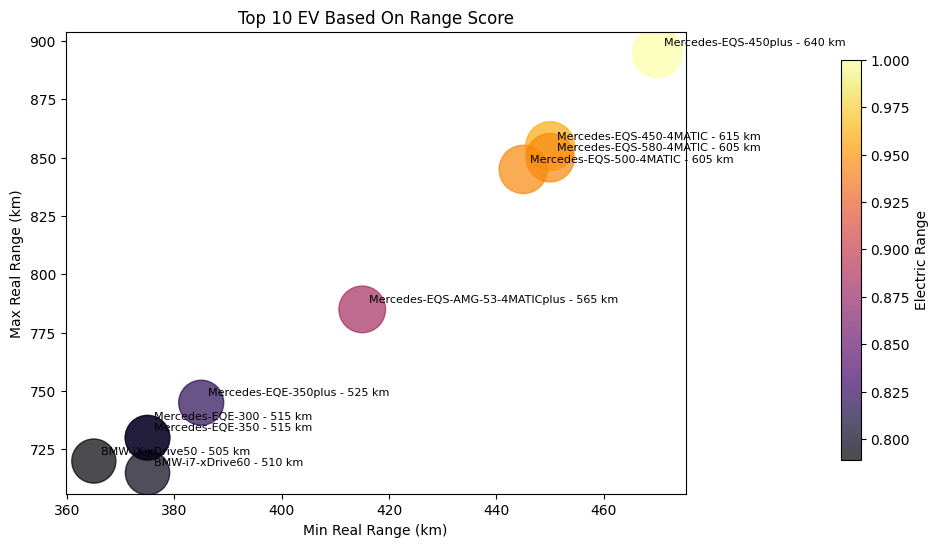

In [60]:
import matplotlib.pyplot as plt

# Access the required columns from the DataFrame
minrrange = range_result1['minrrange']
maxrrange = range_result1['maxrrange']
electric_range = range_result1['electric_range']
model = range_result1['model']

# Compute the color based on the electric range
color = electric_range / max(electric_range)  # Normalize electric range values between 0 and 1

# Create the bubble scatter plot with color mapping
plt.figure(figsize=(10, 6))
scatter = plt.scatter(minrrange, maxrrange, s=electric_range*2, alpha=0.7, c=color, cmap='inferno')

# Add labels for each point (model name and electric range)
prev_x, prev_y = None, None
for i in range(len(range_result1)):
    if minrrange[i] == prev_x and maxrrange[i] == prev_y:
        y_offset = 8  # Adjust the y-offset to move the model name to the next line
    else:
        y_offset = 0
    plt.annotate(f"{model[i]} - {electric_range[i]} km", xy=(minrrange[i], maxrrange[i]),
                 xytext=(5, 5 + y_offset), textcoords='offset points', fontsize=8)
    prev_x, prev_y = minrrange[i], maxrrange[i]

# Set colorbar
cbar = plt.colorbar(scatter)
cbar.ax.set_position([0.9, 0.1, 0.02, 0.8])  # Adjust the position of the colorbar further to the right

cbar.set_label('Electric Range')

# Set plot title and axis labels
plt.title('Top 10 EV Based On Range Score')
plt.xlabel('Min Real Range (km)')
plt.ylabel('Max Real Range (km)')

# Show the plot
plt.show()


These are the 10 EV cars that have greater Range Score

> *What are the top 10 EV cars that has greater battery performance interms of capacity and speed ?*

Sales reps should consider battery capacity for longer electric range, while faster charge speed and fast charge capability ensures quick recharging between appointments, enabling efficient and uninterrupted sales activities.

In [35]:
# Extracting top models with a battery score greater than l1
battery_result= df[(df['battery_score']>=11 )][['make','model','battery_capacity','charge_speed',"fastcharge_speed",'bc_rank', 'cs_rank','fcs_rank']]

# Sorting the output based on  battery capacity,fast charge speed and charge speed
battery_result=battery_result.sort_values(by=['battery_capacity','fastcharge_speed','charge_speed'] , ascending=False)

# Top ten models and makes that satisifies the criteria
battery_result= battery_result.head(10).reset_index()
battery_result

,index,make,model,battery_capacity,charge_speed,fastcharge_speed,bc_rank,cs_rank,fcs_rank
0,155,Mercedes,Mercedes-EQS-450plus,120.0,56,960,4,4,4
1,178,Mercedes,Mercedes-EQS-450-4MATIC,120.0,53,920,4,4,4
2,32,Mercedes,Mercedes-EQS-580-4MATIC,120.0,52,900,4,3,4
3,68,Mercedes,Mercedes-EQS-500-4MATIC,120.0,52,900,4,3,4
4,50,Mercedes,Mercedes-EQS-AMG-53-4MATICplus,120.0,49,840,4,3,4
5,108,Mercedes,Mercedes-EQE-350plus,100.0,54,780,4,4,4
6,64,Mercedes,Mercedes-EQE-350-4MATIC,100.0,52,750,4,3,4
7,84,Mercedes,Mercedes-EQE-500-4MATIC,100.0,52,750,4,3,4
8,18,Mercedes,Mercedes-EQE-AMG-53-4MATICplus,100.0,50,720,4,3,4
9,125,Mercedes,Mercedes-EQE-AMG-43-4MATIC,100.0,50,720,4,3,4


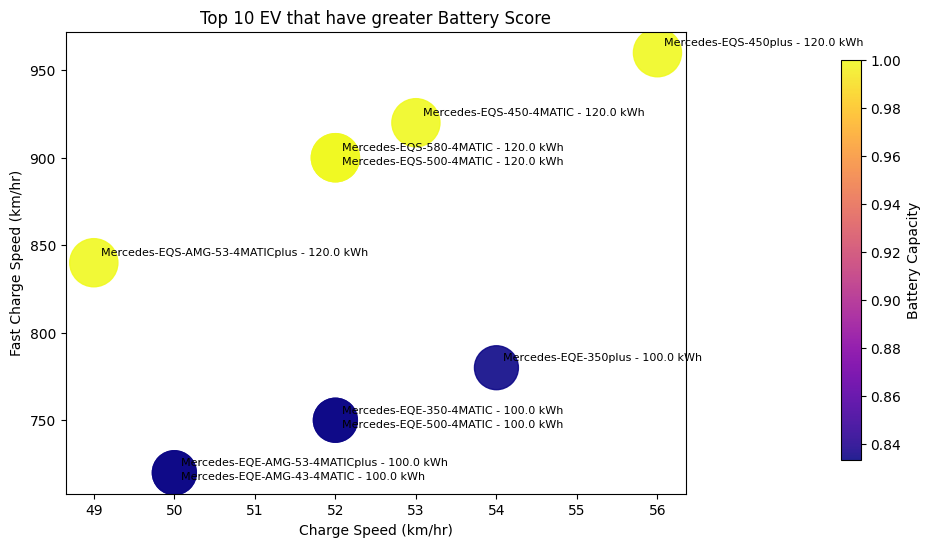

In [89]:
import matplotlib.pyplot as plt

# Access the required columns from the DataFrame
battery_capacity = battery_result['battery_capacity']
charge_speed = battery_result['charge_speed']
fastcharge_speed = battery_result['fastcharge_speed']
model = battery_result['model']

color = battery_capacity / max(battery_capacity)

# Create the bubble scatter plot with color mapping based on battery capacity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(charge_speed, fastcharge_speed, s=battery_capacity*10, alpha=0.9, c=color, cmap='plasma')

# Add labels for each point (model name and battery capacity)
prev_x, prev_y = None, None
for i in range(len(battery_result)):
    if charge_speed[i] == prev_x and fastcharge_speed[i] == prev_y:
        y_offset = -5  # Adjust the y-offset to move the model name to the next line
    else:
        y_offset = 5
    plt.annotate(f"{model[i]} - {battery_capacity[i]} kWh", xy=(charge_speed[i], fastcharge_speed[i]),
                 xytext=(5, y_offset), textcoords='offset points', fontsize=8)
    prev_x, prev_y = charge_speed[i], fastcharge_speed[i]

# Set colorbar
cbar = plt.colorbar(scatter)
cbar.ax.set_position([0.9, 0.1, 0.02, 0.8])

cbar.set_label('Battery Capacity')

# Set plot title and axis labels
plt.title('Top 10 EV that have greater Battery Score')
plt.xlabel('Charge Speed (km/hr)')
plt.ylabel('Fast Charge Speed (km/hr)')

# Show the plot
plt.show()


These are the 10 EV cars that have greater Battery Score

> *What are the top ten cars based on volume scores?*

Sales reps often need to carry merchandise, samples, presentation materials, or equipment with them during their sales visits. So Cargo volume and payload plays a significant factor.

In [37]:
# Extracting top models with a volume score equal to 8
volume_result= df[(df['volume_score']==8)][['make','model','max_payload','cargo_volume','mp_rank', 'cv_rank']]

# Sorting the output based on cargo volume
volume_result=volume_result.sort_values(by='cargo_volume', ascending=False)

# Top ten models and makes that satisifies the criteria
volume_result=volume_result.head(10).reset_index()
volume_result

,index,make,model,max_payload,cargo_volume,mp_rank,cv_rank
0,120,Mercedes,Mercedes-EQV-300-Extra-Long,915,1410,4,4
1,58,Mercedes,Mercedes-EQV-300-Long,940,1030,4,4
2,156,Peugeot,Peugeot-e-Traveller-Long-75-kWh,1014,989,4,4
3,66,Peugeot,Peugeot-e-Expert-Combi-Long-75-kWh,1014,989,4,4
4,72,Peugeot,Peugeot-e-Expert-Combi-Long-50-kWh,1094,989,4,4
5,135,Peugeot,Peugeot-e-Traveller-Long-50-kWh,1094,989,4,4
6,123,Toyota,Toyota-PROACE-Verso-L-75-kWh,1008,989,4,4
7,42,Toyota,Toyota-PROACE-Shuttle-L-50-kWh,1003,980,4,4
8,102,Toyota,Toyota-PROACE-Shuttle-L-75-kWh,911,980,4,4
9,183,Opel,Opel-Vivaro-e-Combi-L-75-kWh,1008,912,4,4


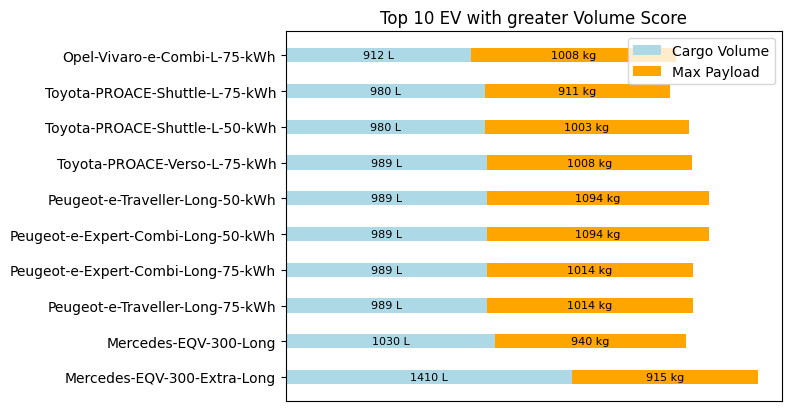

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the required columns from the DataFrame
model_names = volume_result['model']
cargo_volume = volume_result['cargo_volume']
max_payload = volume_result['max_payload']

# Set the positions of the bars on the y-axis
y = np.arange(len(model_names))

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the stacked bars
bar1 = ax.barh(y, cargo_volume, label='Cargo Volume', height=0.4, color='lightblue')
bar2 = ax.barh(y, max_payload, label='Max Payload', left=cargo_volume, height=0.4, color='orange')

# Set the y-axis ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(model_names)

# Remove the x-axis
ax.set_xticks([])

# Set the chart title
ax.set_title('Top 10 EV with greater Volume Score')

# Add the values inside the bars along with units
for i, (c_vol, m_payload) in enumerate(zip(cargo_volume, max_payload)):
    ax.text(c_vol / 2, i, f"{c_vol} L", ha='center', va='center', color='black', fontsize=8)
    ax.text(c_vol + m_payload / 2, i, f"{m_payload} kg", ha='center', va='center', color='black', fontsize=8)

# Add a legend
ax.legend()

# Show the chart
plt.show()


> *What are the top EV cars that has greater range score and battery score?*

Range, battery capacity, charge speed and fast charging speed are the most important factors to consider

Getting data for ev cars whose range score and battery score are greater than 75th percentile of the dataset

In [39]:
# Extracting top models with a volume score equal to 8 and battery score equal to 12
model_result= df[(df['range_score']==8) &(df['battery_score']==12)][['make','model','minrrange',
                                                                                              'maxrrange','electric_range',
                                                                                              'battery_capacity', 'charge_speed','fastcharge_speed','cargo_volume','seats']]
# Sorting the values in ascending order based on electric range
model_result=model_result.sort_values(by='electric_range', ascending=False)

# Models and makes that satisfies the criteria
model_result=model_result.reset_index()
model_result

,index,make,model,minrrange,maxrrange,electric_range,battery_capacity,charge_speed,fastcharge_speed,cargo_volume,seats
0,155,Mercedes,Mercedes-EQS-450plus,470,895,640,120.0,56,960,610,5
1,178,Mercedes,Mercedes-EQS-450-4MATIC,450,855,615,120.0,53,920,610,5
2,108,Mercedes,Mercedes-EQE-350plus,385,745,525,100.0,54,780,430,5
3,187,Porsche,Porsche-Taycan-Plus,345,670,475,93.4,53,1170,407,4
4,3,BMW,BMW-i4-eDrive40,340,670,470,83.9,54,730,470,5


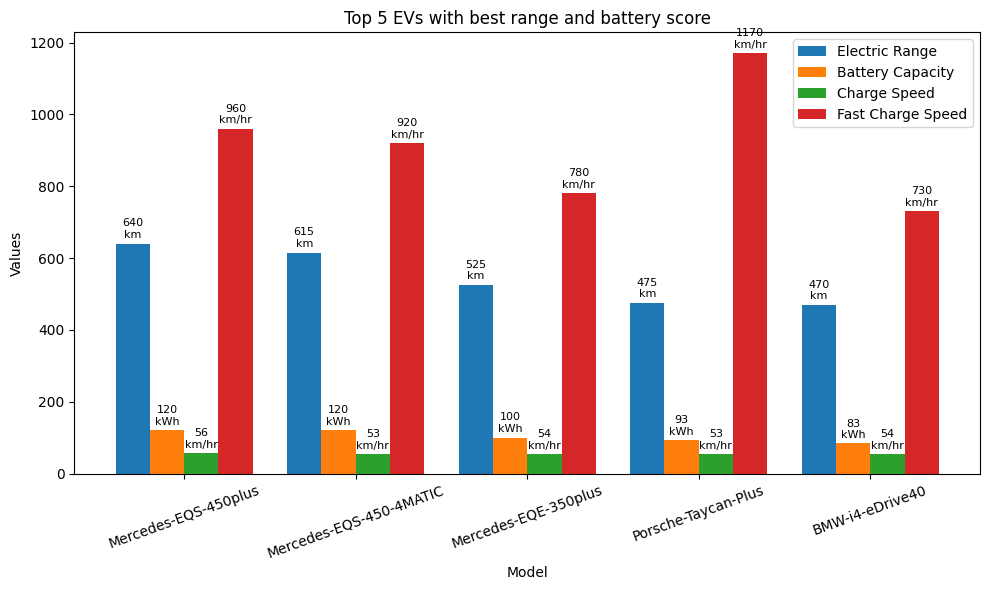

In [40]:

import numpy as np

# Access the required columns from the DataFrame
model = model_result['model']
electric_range = model_result['electric_range']
battery_capacity = model_result['battery_capacity']
charge_speed = model_result['charge_speed']
fastcharge_speed = model_result['fastcharge_speed']

# Set the categories and their corresponding data
categories = ['Electric Range', 'Battery Capacity', 'Charge Speed', 'Fast Charge Speed']
data = np.array([electric_range, battery_capacity, charge_speed, fastcharge_speed])

# Set colors for each category
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Set the width for each bar
width = 0.2

# Set the positions of the bars on the x-axis
positions = np.arange(len(model))

# Create the clustered bar chart
plt.figure(figsize=(10, 6))
for i in range(len(categories)):
    plt.bar(positions + (i * width), data[i], width=width, label=categories[i], color=colors[i])

# Set plot title and axis labels
plt.title('Top 5 EVs with best range and battery score')
plt.xlabel('Model')
plt.ylabel('Values')

# Set the x-axis tick positions and labels
plt.xticks(positions + (width * (len(categories) - 1) / 2), model, rotation=20)

# Add labels for each bar value
for i in range(len(model)):
    for j in range(len(categories)):
        value = int(data[j][i])
        if j == 0:
            unit = 'km'
        elif j == 1:
            unit = 'kWh'
        else:
            unit = 'km/hr'
        plt.text(positions[i] + (j * width), value + 10, f"{value}\n{unit}", ha='center', va='bottom', fontsize=8, rotation='horizontal')

# Create a legend
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


*creating a 3D matrix representing the total number of models that fit within each score combination of range_score, battery_score, and volume_score*

In [41]:

# Filter the DataFrame based on the specified conditions
filtered_data = df[(df['range_score'] >= 6) & (df['battery_score'] >= 9) & (df['volume_score'] >= 6)]

# Group the filtered data by the three variables and count the number of rows in each group
grouped_data = filtered_data.groupby(['battery_score', 'range_score', 'volume_score']).size().reset_index(name='count')

# Create the 3D matrix using pivot_table()
matrix = pd.pivot_table(grouped_data, values='count', index='range_score', columns=['volume_score', 'battery_score'], fill_value=0)

# Remove underscores and capitalize the variable names
matrix.columns = [f'Battery Score: {col[1]} | Volume Score: {col[0]}' for col in matrix.columns]

# Rename the index column
matrix.rename_axis('Range Score', axis=0, inplace=True)

# Add borders to both rows and columns
styled_matrix = matrix.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
])

# Display the styled matrix
styled_matrix



,Battery Score: 9 | Volume Score: 6,Battery Score: 10 | Volume Score: 6,Battery Score: 11 | Volume Score: 6,Battery Score: 12 | Volume Score: 6,Battery Score: 9 | Volume Score: 7,Battery Score: 11 | Volume Score: 7,Battery Score: 9 | Volume Score: 8
Range Score,,,,,,,
6,5,3,1,0,1,0,2
7,3,0,0,0,0,0,0
8,3,3,5,3,4,2,0


> *Among the models considered, the ones with a range score of 8 are considered the best. The above average ones have minimum of 6.*

> *The above average models have a battery score of at least 10, with the best models having a max score of 12.*

> *For the volume score, the above average models have a minimum score of 6, but best models have a max score of 8.*

From the matrix we can infer that our top models should satisfy this criteria (range score equals to 8, battery score greater than or equal to 10, volume score greater than or equal to 6)

No compromise on range score as range plays a crucial factor for sales representatives.

The models that fit these scores are our top models.

> *What are the top models that satisfies our conditions?*

In [42]:
# extracting models that satisfies the criteria.
bestmodel_result1= df[(df['range_score']==8) &(df['battery_score']>=10) & (df['volume_score']>=6)][['make','model','minrrange',
                                                                                                   'maxrrange','electric_range',
                                                                                                   'battery_capacity', 'charge_speed','fastcharge_speed','cargo_volume','max_payload','seats']]

# sorting the values based on the key factors like electric range, battery capacity and cargo volume.
bestmodel_result1=bestmodel_result1.sort_values(by=['electric_range','battery_capacity','cargo_volume'], ascending=False)

bestmodel_result1=bestmodel_result1.reset_index()
bestmodel_result1


,index,make,model,minrrange,maxrrange,electric_range,battery_capacity,charge_speed,fastcharge_speed,cargo_volume,max_payload,seats
0,155,Mercedes,Mercedes-EQS-450plus,470,895,640,120.0,56,960,610,540,5
1,178,Mercedes,Mercedes-EQS-450-4MATIC,450,855,615,120.0,53,920,610,520,5
2,32,Mercedes,Mercedes-EQS-580-4MATIC,450,850,605,120.0,52,900,610,550,5
3,68,Mercedes,Mercedes-EQS-500-4MATIC,445,845,605,120.0,52,900,610,520,5
4,50,Mercedes,Mercedes-EQS-AMG-53-4MATICplus,415,785,565,120.0,49,840,610,645,5
5,165,BMW,BMW-i7-xDrive60,375,715,510,105.0,47,610,500,610,5
6,106,BMW,BMW-iX-xDrive50,365,720,505,111.5,45,680,500,635,5
7,187,Porsche,Porsche-Taycan-Plus,345,670,475,93.4,53,1170,407,665,4
8,157,Porsche,Porsche-Taycan-4S-Plus,335,645,460,93.4,51,1130,407,660,4
9,124,Skoda,Skoda-Enyaq-Coupe-iV-80,320,645,445,82.0,54,560,575,556,5


> *Car make distribution of top models?*

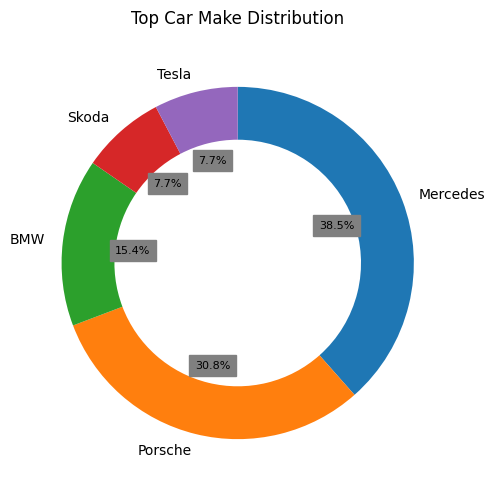

In [43]:
# Count the occurrences of each make
make_counts = bestmodel_result1['make'].value_counts()

# Calculate the percentage values
make_percentages = make_counts / make_counts.sum() * 100

# Create a pie chart
plt.figure(figsize=(5, 6))
wedges, _, autotexts = plt.pie(make_counts, labels=make_counts.index, startangle=90, counterclock=False,
                               wedgeprops=dict(width=0.3), autopct='%.1f%%')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Set title for the chart
plt.title('Top Car Make Distribution')

# Add labels with make names and percentage values
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('black')
    autotext.set_backgroundcolor('grey')


# Display the chart
plt.show()


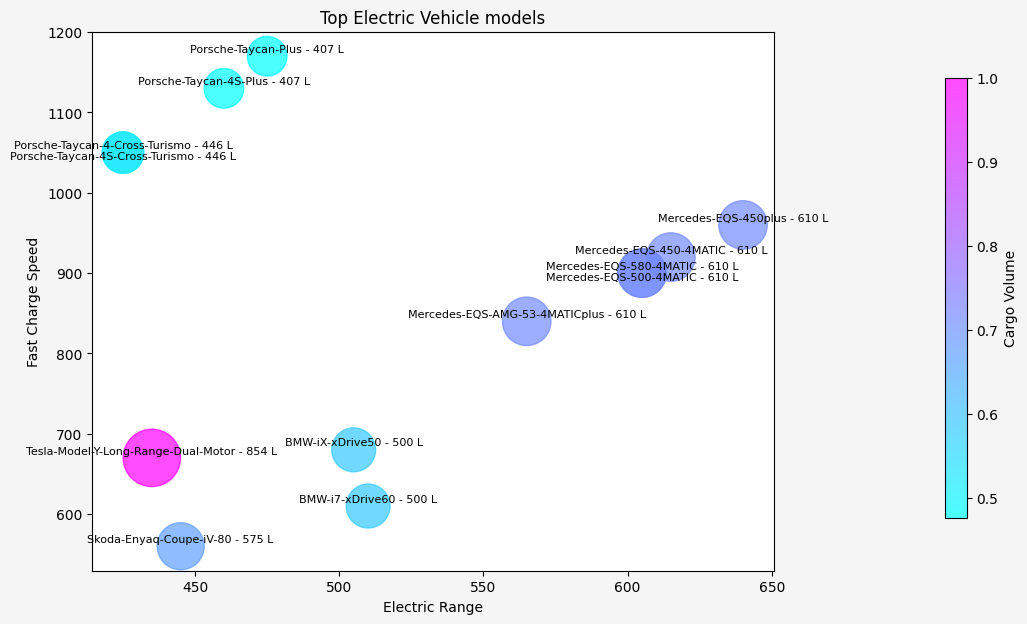

In [66]:
import matplotlib.pyplot as plt

# Access the required columns from the DataFrame
electric_range = bestmodel_result1['electric_range']
cargo_volume = bestmodel_result1['cargo_volume']
fastcharge_speed = bestmodel_result1['fastcharge_speed']
model = bestmodel_result1['model']

# Compute the color based on the cargo volume
color = cargo_volume / max(cargo_volume)  # Normalize cargo volume values between 0 and 1

# Create the bubble scatter plot with color mapping
fig, ax = plt.subplots(figsize=(11, 7))

# Set background color for the entire figure
fig.patch.set_facecolor('#F5F5F5')  # Light gray color

# Set background color within the plot area
ax.patch.set_facecolor('white')

scatter = ax.scatter(electric_range, fastcharge_speed, s=cargo_volume*2, alpha=0.7, c=color, cmap='cool')

# Set plot title and axis labels
ax.set_title('Top Electric Vehicle models')
ax.set_xlabel('Electric Range')
ax.set_ylabel('Fast Charge Speed')

# Add labels for each point (model name and cargo volume)
prev_x, prev_y = None, None
for x, y, m, v in zip(electric_range, fastcharge_speed, model, cargo_volume):
    if x == prev_x and y == prev_y:
        y_offset = -3  # Adjust the y-offset to move the model name to the next line
    else:
        y_offset = 5
    ax.annotate(f"{m} - {v} L", xy=(x, y), xytext=(0, y_offset), textcoords="offset points",
                fontsize=8, ha='center', va='center')
    prev_x, prev_y = x, y

# Set colorbar
cbar = plt.colorbar(scatter)
cbar.ax.set_position([0.9, 0.1, 0.02, 0.8])  # Adjust the position of the colorbar further to the right
cbar.set_label('Cargo Volume')

# Show the plot
plt.show()


*Matrix table representing the total number of models that fit within each score combination of range_score equal to 8, battery_score greater than or equal to 10 and volume_score greater than or equal to 6.*

In [45]:
# Import pandas library
import pandas as pd

# Filter the DataFrame based on the specified conditions
filtered_data = df[(df['range_score'] == 8) & (df['battery_score'] >= 10) & (df['volume_score'] >= 6)]

# Group the filtered data by the three variables and count the number of rows in each group
grouped_data = filtered_data.groupby(['battery_score', 'range_score', 'volume_score']).size().reset_index(name='count')

# Create the 3D matrix using pivot_table()
matrix = pd.pivot_table(grouped_data, values='count', index='range_score', columns=['volume_score', 'battery_score'], fill_value=0)

# Remove underscores and capitalize the variable names
matrix.columns = [f'Battery Score: {col[1]} | Volume Score: {col[0]}' for col in matrix.columns]

# Rename the index column
matrix.rename_axis('Range Score', axis=0, inplace=True)

# Add borders to both rows and columns
styled_matrix = matrix.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
])

# Define a function to highlight the columns that meet the specified conditions
def highlight_columns(col):
    is_target_column = any([
        ('Range Score: 8' in col) and (int(col.split('|')[1].split(':')[1].strip()) >= 10) and (int(col.split('|')[0].split(':')[1].strip()) >= 6)
        for col in matrix.columns
    ])
    return ['background-color: yellow' if is_target_column else '' for _ in col]

# Apply the highlight_columns function to the styled matrix
styled_matrix = styled_matrix.apply(lambda _: highlight_columns(_), axis=1)

# Display the styled matrix
styled_matrix



,Battery Score: 10 | Volume Score: 6,Battery Score: 11 | Volume Score: 6,Battery Score: 12 | Volume Score: 6,Battery Score: 11 | Volume Score: 7
Range Score,,,,
8,3,5,3,2


> *Among our top models, which 5 models have the highest scores in terms of range, battery, and volume score?*

From the above matrix table we can see there are 5 models with range score,battery score, volume score equal to 8,12,6 and range score,battery score, volume score equal to 8,11,7 respectively.

Apart from range score and battery score , the key factors considered are range score, fast charging speed , cargo volume.

In [46]:
# extrating the top 5 models based on the matrix table
bestmodel1= df[((df['range_score']==8) &(df['battery_score']>=11) & (df['volume_score']>=7))|
 (df['range_score']==8) &(df['battery_score']==12) & (df['volume_score']>=6)][["make","model","seats","electric_range",
                                                                               "minrrange","maxrrange","battery_capacity","charge_speed","fastcharge_speed",
                                                                               "cargo_volume","max_payload","top_speed","charge_time","fastcharge_time"]]
# sorting in descending order based on range, fast charge speed and  cargo volume
bestmodel1=bestmodel1.sort_values(by=['electric_range','fastcharge_speed','cargo_volume'], ascending=False)
bestmodel1=bestmodel1.reset_index()
bestmodel1

,index,make,model,seats,electric_range,minrrange,maxrrange,battery_capacity,charge_speed,fastcharge_speed,cargo_volume,max_payload,top_speed,charge_time,fastcharge_time
0,155,Mercedes,Mercedes-EQS-450plus,5,640,470,895,120.0,56,960,610,540,210,11.428571,0.666667
1,178,Mercedes,Mercedes-EQS-450-4MATIC,5,615,450,855,120.0,53,920,610,520,210,11.603774,0.668478
2,50,Mercedes,Mercedes-EQS-AMG-53-4MATICplus,5,565,415,785,120.0,49,840,610,645,250,11.530612,0.672619
3,187,Porsche,Porsche-Taycan-Plus,4,475,345,670,93.4,53,1170,407,665,230,8.962264,0.405983
4,138,Tesla,Tesla-Model-Y-Long-Range-Dual-Motor,5,435,315,635,82.0,54,670,854,640,217,8.055556,0.649254


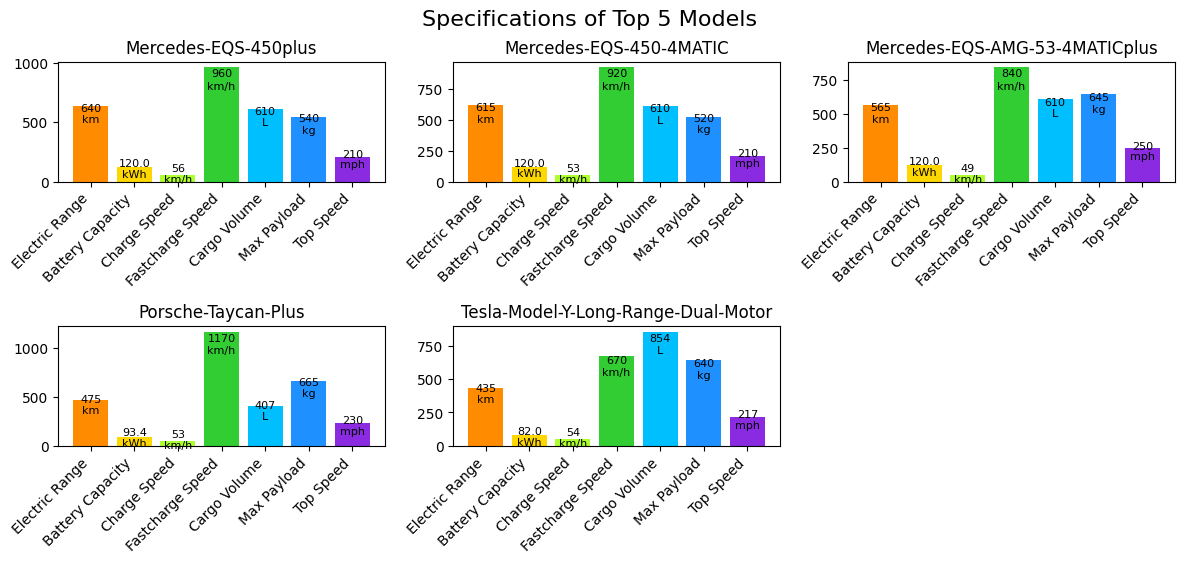

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Access the required columns from the DataFrame
model = bestmodel1['model']
electric_range = bestmodel1['electric_range']
battery_capacity = bestmodel1['battery_capacity']
charge_speed = bestmodel1['charge_speed']
fastcharge_speed = bestmodel1['fastcharge_speed']
cargo_volume = bestmodel1['cargo_volume']
max_payload = bestmodel1['max_payload']
top_speed = bestmodel1['top_speed']

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 3
num_subplots = num_rows * num_cols

# Define custom colors for the bars
bar_colors = ['#FF8C00', '#FFD700', '#ADFF2F', '#32CD32', '#00BFFF', '#1E90FF', '#8A2BE2']

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4)  # Adjust vertical spacing between subplots

# Iterate over each model and plot the clustered bar chart in a separate subplot
for i, (m, ax) in enumerate(zip(model, axes.flatten())):
    # Select data for the current model
    model_electric_range = electric_range[i]
    model_battery_capacity = battery_capacity[i]
    model_charge_speed = charge_speed[i]
    model_fastcharge_speed = fastcharge_speed[i]
    model_cargo_volume = cargo_volume[i]
    model_max_payload = max_payload[i]
    model_top_speed = top_speed[i]

    # Define the x-axis positions for the bars
    x = np.arange(7)  # Adjust the number of bars based on the number of features

    # Define the feature labels for the x-axis
    features = ['Electric Range', 'Battery Capacity', 'Charge Speed', 'Fastcharge Speed',
                'Cargo Volume', 'Max Payload', 'Top Speed']

    # Define the feature values and units for the current model
    values = [model_electric_range, model_battery_capacity, model_charge_speed,
              model_fastcharge_speed, model_cargo_volume, model_max_payload, model_top_speed]
    units = ['km', 'kWh', 'km/h', 'km/h', 'L', 'kg', 'mph']

    # Plot the clustered bar chart with custom colors
    bars = ax.bar(x, values, color=bar_colors)
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, ha='right')
    ax.set_title(m)

    # Annotate each bar with its corresponding value and unit
    for j, (bar, val, unit) in enumerate(zip(bars, values, units)):
        height = bar.get_height()
        offset = 10 if val < 100 else height * 0.02  # Choose offset based on value size

        # Check if the feature is "Charge Speed"
        if features[j] == 'Charge Speed':
            ax.text(bar.get_x() + bar.get_width() / 2, height + offset, f"{val}", ha='center', va='bottom', fontsize=8)
            ax.text(bar.get_x() + bar.get_width() / 2, height + offset - 0.1 * height, f"{unit}", ha='center', va='top', fontsize=8)
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, height - 0.1 * height, f"{val}", ha='center', va='bottom', fontsize=8)
            ax.text(bar.get_x() + bar.get_width() / 2, height - offset - 0.1 * height, f"{unit}", ha='center', va='top', fontsize=8)

# Remove empty subplots if there are fewer models than the total number of subplots
if len(model) < num_subplots:
    for j in range(len(model), num_subplots):
        fig.delaxes(axes.flatten()[j])

# Set common title for the entire figure
fig.suptitle("Specifications of Top 5 Models", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


Based on the given data the best models that satisfies our conditions are

*  *Mercedes-EQS-450plus*
*  *Mercedes-EQS-450-4MATIC*
*  *Mercedes-EQS-AMG-53-4MATICplus*
*  *Porsche-Taycan-Plus*
*  *Tesla-Model-Y-Long-Range-Dual-Moto*

> Best 4 seater car is *Porsche-Taycan-Plus*

> Best 5 seater car is *Mercedes-EQS-450plus*

**Further Analysis Doesn't belong to the scope of the case study**

In [48]:
ndf=df[(df['range_score']==8) &(df['battery_score']>=11) & (df['volume_score']>=6)]
ndf.sort_values(by=['electric_range','fastcharge_speed','cargo_volume'])
ndf.reset_index()

,index,id,make,link,top_speed,electric_range,drive,battery_capacity,charge_speed,fastcharge_speed,length,width,height,wheelbase,gvwr,max_payload,cargo_volume,seats,model,minrrange,maxrrange,charge_time,fastcharge_time,bc_rank,cs_rank,fcs_rank,er_rank,mnr_rank,mxr_rank,mp_rank,cv_rank,ct_rank,fct_rank,ts_rank,range_score,battery_score,volume_score
0,19,1186,Porsche,https://ev-database.org/car/1186/Porsche-Tayca...,220,425,AWD,93.4,47,1050,4974,1967,1409,2904,2885,715,446,4,Porsche-Taycan-4-Cross-Turismo,310,610,9.042553,0.404762,4,3,4,4,4,4,4,2,3,1,4,8,11,6
1,32,1484,Mercedes,https://ev-database.org/car/1484/Mercedes-EQS-...,210,605,AWD,120.0,52,900,5216,1926,1512,3210,3060,550,610,5,Mercedes-EQS-580-4MATIC,450,850,11.634615,0.672222,4,3,4,4,4,4,2,4,4,2,4,8,11,6
2,50,1537,Mercedes,https://ev-database.org/car/1537/Mercedes-EQS-...,250,565,AWD,120.0,49,840,5223,1926,1518,3210,3225,645,610,5,Mercedes-EQS-AMG-53-4MATICplus,415,785,11.530612,0.672619,4,3,4,4,4,4,3,4,4,2,4,8,11,7
3,68,1700,Mercedes,https://ev-database.org/car/1700/Mercedes-EQS-...,210,605,AWD,120.0,52,900,5216,1926,1512,3210,3060,520,610,5,Mercedes-EQS-500-4MATIC,445,845,11.634615,0.672222,4,3,4,4,4,4,2,4,4,2,4,8,11,6
4,116,1437,Porsche,https://ev-database.org/car/1437/Porsche-Tayca...,240,425,AWD,93.4,47,1050,4974,1967,1409,2904,2885,715,446,4,Porsche-Taycan-4S-Cross-Turismo,310,610,9.042553,0.404762,4,3,4,4,4,4,4,2,3,1,4,8,11,6
5,138,1619,Tesla,https://ev-database.org/car/1619/Tesla-Model-Y...,217,435,AWD,82.0,54,670,4751,1921,1624,2890,2619,640,854,5,Tesla-Model-Y-Long-Range-Dual-Motor,315,635,8.055556,0.649254,3,4,4,4,4,4,3,4,2,2,4,8,11,7
6,155,1483,Mercedes,https://ev-database.org/car/1483/Mercedes-EQS-...,210,640,Rear,120.0,56,960,5216,1926,1512,3210,2945,540,610,5,Mercedes-EQS-450plus,470,895,11.428571,0.666667,4,4,4,4,4,4,2,4,4,2,4,8,12,6
7,157,1238,Porsche,https://ev-database.org/car/1238/Porsche-Tayca...,250,460,AWD,93.4,51,1130,4963,1966,1379,2900,2880,660,407,4,Porsche-Taycan-4S-Plus,335,645,9.019608,0.407080,4,3,4,4,4,4,4,2,3,1,4,8,11,6
8,178,1699,Mercedes,https://ev-database.org/car/1699/Mercedes-EQS-...,210,615,AWD,120.0,53,920,5216,1926,1512,3210,3060,520,610,5,Mercedes-EQS-450-4MATIC,450,855,11.603774,0.668478,4,4,4,4,4,4,2,4,4,2,4,8,12,6
9,187,1394,Porsche,https://ev-database.org/car/1394/Porsche-Tayca...,230,475,Rear,93.4,53,1170,4963,1966,1394,2900,2795,665,407,4,Porsche-Taycan-Plus,345,670,8.962264,0.405983,4,4,4,4,4,4,4,2,3,1,4,8,12,6


Extracting price value from the link provided in the data set.

Creating a new cloumn price.

In [49]:
import requests
from bs4 import BeautifulSoup

def extract_price(link):
    response = requests.get(link)
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')
    pricing_table = soup.find('div', id='pricing')

    if pricing_table:
        pricing_table = pricing_table.find('table')
        uk_price_row = None

        for row in pricing_table.find_all('tr'):
            cells = row.find_all('td')
            if len(cells) > 1 and 'United Kingdom' in cells[0].text:
                uk_price_row = cells
                break

        if uk_price_row:
            uk_price = uk_price_row[1].text.strip()
            return uk_price

    return 'Price not found'

# Create a copy of the filtered DataFrame
ndf = df[(df['range_score'] == 8) & (df['battery_score'] >= 11) & (df['volume_score'] >= 6)].copy()

# Update DataFrame using .loc indexer
ndf.loc[:, 'price'] = ndf['link'].apply(extract_price)



Dropping rows that doesn't have price value

In [50]:
best=ndf[["id","make","model","price","seats","electric_range","minrrange","maxrrange","battery_capacity","charge_speed","fastcharge_speed","cargo_volume","max_payload","top_speed","charge_time","fastcharge_time"]]

# Drop rows based on column values
best = best.drop(best[best['price'] == 'Not Available'].index)

Price column is in string format.

Removing the £ and ,. Then converting to integer format  

In [51]:
# Remove pound sign and comma, and converting to integer data type
best['price'] = best['price'].str.replace('£', '').str.replace(',', '').astype(int)
best = best.reset_index(drop=True)

## **Top 5 seater model with least price**

In [52]:
best1=best.sort_values(by="price",ascending=True)
best1=best1.head(1)
best1

,id,make,model,price,seats,electric_range,minrrange,maxrrange,battery_capacity,charge_speed,fastcharge_speed,cargo_volume,max_payload,top_speed,charge_time,fastcharge_time
3,1619,Tesla,Tesla-Model-Y-Long-Range-Dual-Motor,52990,5,435,315,635,82.0,54,670,854,640,217,8.055556,0.649254


In [53]:
import pandas as pd

# Transpose the DataFrame
transposed_df = best1.T

# Define a dictionary to map units for each specification
unit_mapping = {
    'top_speed': 'km/h',
    'electric_range': 'km',
    'battery_capacity': 'kWh',
    'charge_speed': 'kW',
    'fastcharge_speed': 'kW',
    'cargo_volume': 'L',
    'max_payload': 'kg',
    'charge_time': 'hours',
    'fastcharge_time': 'hours'
}

# Append units to the index names
transposed_df.index = [idx.replace('_', ' ') + f' ({unit_mapping[idx]})' if idx in unit_mapping else idx.replace('_', ' ') for idx in transposed_df.index]

# Print the modified transposed DataFrame
print(transposed_df)


                                                           3
id                                                      1619
make                                                   Tesla
model                    Tesla-Model-Y-Long-Range-Dual-Motor
price                                                  52990
seats                                                      5
electric range (km)                                      435
minrrange                                                315
maxrrange                                                635
battery capacity (kWh)                                  82.0
charge speed (kW)                                         54
fastcharge speed (kW)                                    670
cargo volume (L)                                         854
max payload (kg)                                         640
top speed (km/h)                                         217
charge time (hours)                                 8.055556
fastcharge time (hours) 

**Specs of the model** -*Tesla-Model-Y-Long-Range-Dual-Motor* (Top 5 seater model with least price)

## **Top 4 seater model with least price**

In [54]:
best2=best[best['seats']==4].sort_values(by="price")
best2=best2.head(1)
best2

,id,make,model,price,seats,electric_range,minrrange,maxrrange,battery_capacity,charge_speed,fastcharge_speed,cargo_volume,max_payload,top_speed,charge_time,fastcharge_time
6,1394,Porsche,Porsche-Taycan-Plus,79549,4,475,345,670,93.4,53,1170,407,665,230,8.962264,0.405983


In [55]:
import pandas as pd

# Assuming "best" is the DataFrame containing your dataset

# Transpose the DataFrame
transposed_df = best2.T

# Define a dictionary to map units for each specification
unit_mapping = {
    'top_speed': 'km/h',
    'electric_range': 'km',
    'battery_capacity': 'kWh',
    'charge_speed': 'kW',
    'fastcharge_speed': 'kW',
    'cargo_volume': 'L',
    'max_payload': 'kg',
    'charge_time': 'hours',
    'fastcharge_time': 'hours'
}

# Append units to the index names
transposed_df.index = [idx.replace('_', ' ') + f' ({unit_mapping[idx]})' if idx in unit_mapping else idx.replace('_', ' ') for idx in transposed_df.index]

# Print the modified transposed DataFrame
print(transposed_df)

                                           6
id                                      1394
make                                 Porsche
model                    Porsche-Taycan-Plus
price                                  79549
seats                                      4
electric range (km)                      475
minrrange                                345
maxrrange                                670
battery capacity (kWh)                  93.4
charge speed (kW)                         53
fastcharge speed (kW)                   1170
cargo volume (L)                         407
max payload (kg)                         665
top speed (km/h)                         230
charge time (hours)                 8.962264
fastcharge time (hours)             0.405983


**Specs of the model** - *Porsche-Taycan-Plus* (Top 4 seater model with least price)